# Fisher Linear Discriminant Analysis (LDA)

LDA is a widely used dimensionality reduction technique built on Fisher’s linear discriminant.

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Dataset

In [2]:
raw_data = pd.read_csv('data/A_multivariate_study_of_variation_in_two_species_of_rock_crab_of_genus_Leptograpsus.csv')

data = raw_data.rename(columns={
    'sp': 'Species',
    'sex': 'Sex',
    'index': 'Index',
    'FL': 'Frontal Lobe',
    'RW': 'Rear Width',
    'CL': 'Carapace Midline',
    'CW': 'Maximum Width',
    'BD': 'Body Depth'})

data['Species'] = data['Species'].map({'B':'Blue', 'O':'Orange'})
data['Sex'] = data['Sex'].map({'M':'Male', 'F':'Female'})
data['Class'] = data.Species + data.Sex

data_columns = ['Frontal Lobe',
                'Rear Width',
                'Carapace Midline',
                'Maximum Width',
                'Body Depth']

In [3]:
# generate a class variable for all 4 classes
data['Class'] = data.Species + data.Sex

print(data['Class'].value_counts())
data.head(5)

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: Class, dtype: int64


,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [6]:
# normalize data columns
data_norm = data.copy()
data_norm[data_columns] = MinMaxScaler().fit_transform(data[data_columns])

data_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,25.500000,14.467083,1.0,13.000000,25.500000,38.000000,50.0
Frontal Lobe,200.0,0.527233,0.219832,0.0,0.358491,0.525157,0.682390,1.0
Rear Width,200.0,0.455365,0.187835,0.0,0.328467,0.459854,0.569343,1.0
Carapace Midline,200.0,0.529043,0.216382,0.0,0.382219,0.528875,0.684650,1.0
Maximum Width,200.0,0.515053,0.209919,0.0,0.384000,0.525333,0.664000,1.0
Body Depth,200.0,0.511645,0.220953,0.0,0.341935,0.503226,0.677419,1.0


## 2-Dimensional Plot

In [10]:
no_components = 2

lda = LinearDiscriminantAnalysis(n_components = no_components)
data_lda = lda.fit_transform(data_norm[data_columns].values , y=data_norm['Class'])

data_norm[['LDA1', 'LDA2']] = data_lda

data_norm.head(1)

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,LDA1,LDA2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.538869,-0.808137


|  | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | LDA1 | LDA2 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 0.056604 | 0.014599 | 0.042553 | 0.050667 | 0.058065 | BlueMale | 1.538869 | -0.808137 |

<AxesSubplot: xlabel='LDA1', ylabel='LDA2'>

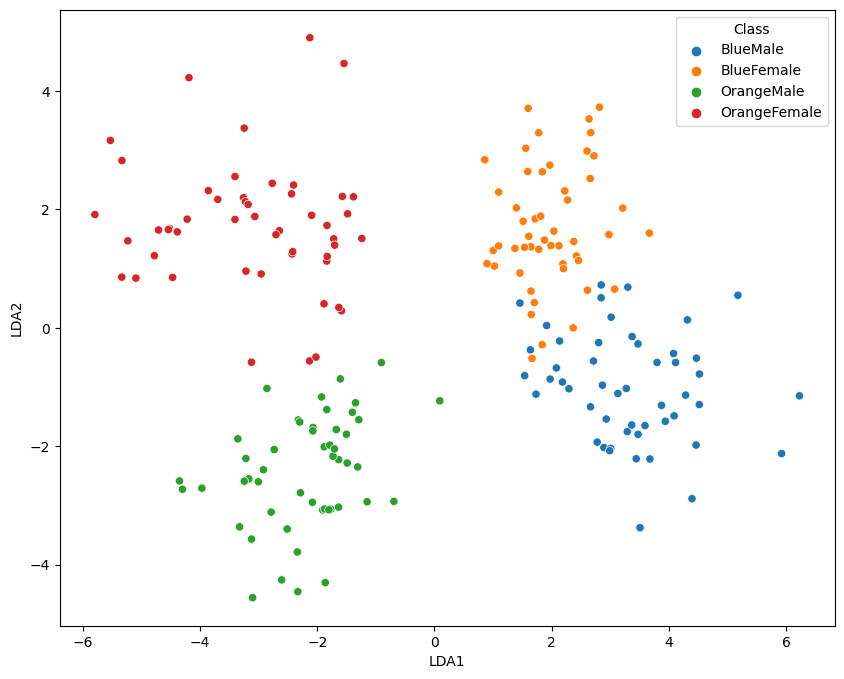

In [11]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA1', y='LDA2', hue='Class', data=data_norm)

![Fisher Linear Discriminant Analysis (LDA)](./assets/Linear_Discriminant_Analysis_01.png)

![Fisher Linear Discriminant Analysis (LDA)](./assets/nice.gif)

## 3-Dimensional Plot

In [13]:
no_components = 3

lda = LinearDiscriminantAnalysis(n_components = no_components)
data_lda = lda.fit_transform(data_norm[data_columns].values , y=data_norm['Class'])

data_norm[['LDA1', 'LDA2', 'LDA3']] = data_lda

data_norm.head(1)

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,LDA1,LDA2,LDA3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.538869,-0.808137,1.18642


|  | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | LDA1 | LDA2 | LDA3 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 0.056604 | 0.014599 | 0.042553 | 0.050667 | 0.058065 | BlueMale | 1.538869 | -0.808137 | 1.18642 |

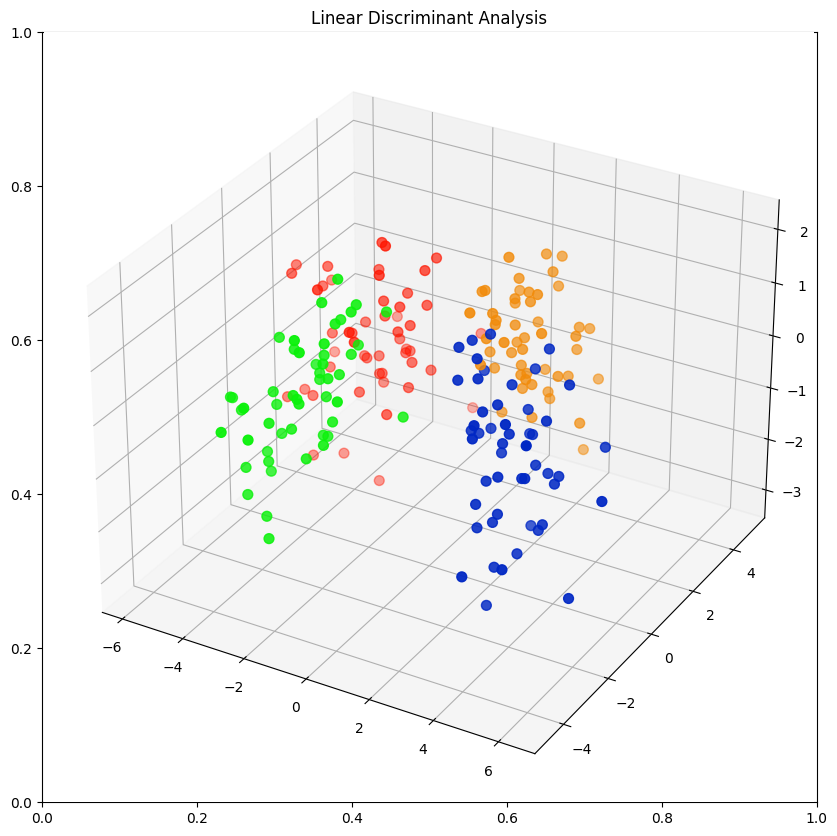

In [15]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data_norm['Class'].apply(lambda x: class_colours[x])

x=data_norm.LDA1
y=data_norm.LDA2
z=data_norm.LDA3

fig = plt.figure(figsize=(10,10))
plt.title('Linear Discriminant Analysis')
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

![Fisher Linear Discriminant Analysis (LDA)](./assets/Linear_Discriminant_Analysis_02.png)